<a href="https://colab.research.google.com/github/tanmaymaloo/CNN_TimeSeriesAnalysis/blob/main/training_1DCNN_TS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gdrive mounting**

In [36]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
cd gdrive/MyDrive/BTP/


[Errno 2] No such file or directory: 'gdrive/MyDrive/BTP/'
/content/gdrive/MyDrive/BTP


In [38]:
ls

BTP_2020.gslides  X.txt  y.txt


# **Importing and reshaping data**

In [39]:
from numpy import array
import numpy as np
import pandas as pd
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler

In [40]:
X_np_shape=(2606, 60, 4)

In [41]:
# retrieving data from file. 
loaded_X = np.loadtxt("X.txt") 
x_np=(2606, 60, 4)
# This loadedArr is a 2D array, therefore 
# we need to convert it to the original 
# array shape.reshaping to get original 
# matrice with original shape. 
load_original_X = loaded_X.reshape(loaded_X.shape[0], loaded_X.shape[1] // X_np_shape[2], X_np_shape[2]) 

In [42]:
np.shape(load_original_X)

(2606, 60, 4)

In [43]:
load_original_X[:2]

array([[[ 7.4498e+02,  4.4700e+00,  9.3908e+02,  1.3500e+00],
        [ 7.4655e+02, -2.0400e+00,  9.3338e+02, -1.1300e+00],
        [ 7.4295e+02,  5.7000e-01,  9.4403e+02,  2.8000e-01],
        [ 7.4610e+02,  5.0500e+00,  9.3720e+02,  1.4300e+00],
        [ 7.4723e+02,  8.0500e+00,  9.3255e+02,  1.5700e+00],
        [ 7.4580e+02,  2.8000e-01,  9.3660e+02, -6.0000e-01],
        [ 7.4415e+02,  7.2800e+00,  9.3758e+02,  1.5600e+00],
        [ 7.4715e+02,  2.8300e+00,  9.3008e+02,  3.0000e-01],
        [ 7.4798e+02,  3.9700e+00,  9.3713e+02,  2.4000e-01],
        [ 7.4708e+02,  3.6900e+00,  9.3675e+02,  1.5200e+00],
        [ 7.4895e+02,  4.0900e+00,  9.3330e+02,  6.5000e-01],
        [ 7.4693e+02,  4.0700e+00,  9.3495e+02,  1.1600e+00],
        [ 7.4430e+02,  5.7000e+00,  9.3750e+02,  1.3300e+00],
        [ 7.4513e+02,  3.4600e+00,  9.3503e+02,  2.6000e-01],
        [ 7.4145e+02,  4.9700e+00,  9.3938e+02,  1.0800e+00],
        [ 7.4573e+02,  2.8400e+00,  9.3030e+02,  7.7000e-01],
        

In [44]:
load_original_y = np.loadtxt("y.txt") 
load_original_y=load_original_y.reshape(load_original_y.shape[0],1)
np.shape(load_original_y)

(2606, 1)

In [45]:
for i in range(2):
  print(load_original_X[i], load_original_y[i])

[[ 7.4498e+02  4.4700e+00  9.3908e+02  1.3500e+00]
 [ 7.4655e+02 -2.0400e+00  9.3338e+02 -1.1300e+00]
 [ 7.4295e+02  5.7000e-01  9.4403e+02  2.8000e-01]
 [ 7.4610e+02  5.0500e+00  9.3720e+02  1.4300e+00]
 [ 7.4723e+02  8.0500e+00  9.3255e+02  1.5700e+00]
 [ 7.4580e+02  2.8000e-01  9.3660e+02 -6.0000e-01]
 [ 7.4415e+02  7.2800e+00  9.3758e+02  1.5600e+00]
 [ 7.4715e+02  2.8300e+00  9.3008e+02  3.0000e-01]
 [ 7.4798e+02  3.9700e+00  9.3713e+02  2.4000e-01]
 [ 7.4708e+02  3.6900e+00  9.3675e+02  1.5200e+00]
 [ 7.4895e+02  4.0900e+00  9.3330e+02  6.5000e-01]
 [ 7.4693e+02  4.0700e+00  9.3495e+02  1.1600e+00]
 [ 7.4430e+02  5.7000e+00  9.3750e+02  1.3300e+00]
 [ 7.4513e+02  3.4600e+00  9.3503e+02  2.6000e-01]
 [ 7.4145e+02  4.9700e+00  9.3938e+02  1.0800e+00]
 [ 7.4573e+02  2.8400e+00  9.3030e+02  7.7000e-01]
 [ 7.4348e+02  3.3200e+00  9.3893e+02  8.1000e-01]
 [ 7.4423e+02  5.1600e+00  9.3368e+02  6.3000e-01]
 [ 7.4633e+02  3.0100e+00  9.3045e+02  8.1000e-01]
 [ 7.4205e+02  3.9400e+00  9.39

In [46]:
#scaler = MinMaxScaler()
#scaler.fit(load_original_y)

# **CETEGORICAL CLASSIFICATION**

In [ ]:
for i in load_original_y:
  print(i)

In [48]:
total = 0
count=0
max = load_original_y[0]
min = load_original_y[0]
for i in load_original_y:
  if i<min and i>60:
    min =i
  elif i> max:
    max = i
  if i > 0.60:
    total = total+i
  else:
    count=count+1


n= len(load_original_y)
mean = total/(n-count)
print("mean : ", total/(n-count))
print("max: ", max)
print("min: ", min)

mean :  [82.67793553]
max:  [89.4]
min:  [62.]


In [49]:
AA = load_original_y.reshape(load_original_y.shape[0])
import statistics
statistics.variance(AA)

8.986127175880847

In [50]:
cat = np.zeros(load_original_y.shape)

In [51]:
cat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [52]:
d= 0
count0 = 0
countneg = 0
countpos = 0

for i in range(1, len(load_original_y)):
  d = load_original_y[i] - load_original_y[i-1]
  if  d <= 0.5 and d >= -0.5:
    cat[i] = 0
    count0 = count0+1
  elif d > 0.5 :
    cat[i] = 1
    countpos = countpos+1
  elif d<-0.5:
    cat[i] = -1
    countneg = countneg+1

In [53]:
cat[0:10]

array([[ 0.],
       [ 0.],
       [ 0.],
       [-1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 0.],
       [ 1.],
       [ 1.]])

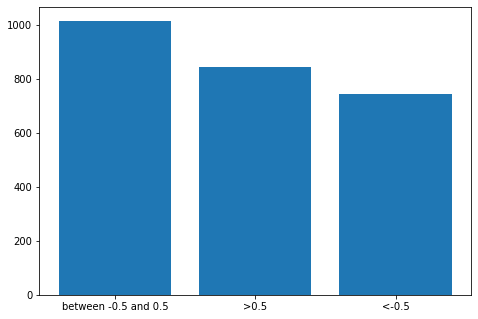

In [54]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
category = ['between -0.5 and 0.5', '>0.5', '<-0.5']
freq = [count0, countpos, countneg]
ax.bar(category,freq)
plt.show()

(array([ 745., 1018.,  843.]),
 array([-1.        , -0.33333333,  0.33333333,  1.        ]),
 <a list of 3 Patch objects>)

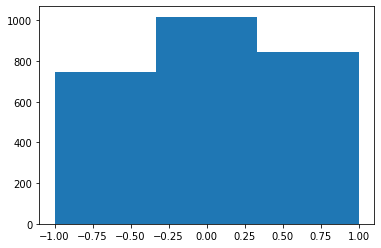

In [69]:
#fig, ax = plt.subplots(1,1)
#ax.hist(cat, bins = 3)

# **Architecture** *old regression model*

In [55]:
#scaler = MinMaxScaler()
#scaler.fit(load_original_y)
load_original_y_t=scaler.transform(load_original_y)

NameError: ignored

In [ ]:
'''
n_steps= np.shape(load_original_X)[1]
n_features= np.shape(load_original_X)[2]
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=128,kernel_size=4, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
'''

In [100]:
n_steps= np.shape(load_original_X)[1]
n_features= np.shape(load_original_X)[2]
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [101]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 57, 16)            272       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 14, 16)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 1125      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 1,403
Trainable params: 1,403
Non-trainable params: 0
_________________________________________________________________


In [102]:
np.shape(load_original_X[:2200])

(2200, 60, 4)

In [98]:
model.fit(array(load_original_X[:2200]).astype('float32'), array(load_original_y_t[:2200]).astype('float32'), epochs=1800, verbose=1)

NameError: ignored

In [104]:
x_input = load_original_X[2].reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

In [105]:
yhat = model.predict(load_original_X[2200:],verbose=0)

In [ ]:
scaler.inverse_transform(yhat)

In [ ]:
for i in range(100):
   print(load_original_y[i],yhat[i])

In [ ]:
load_original_X[2200:]

# **Architecture** *old regression model* 

In [76]:
from sklearn.model_selection import train_test_split
train_set_X, test_set_X, train_set_y, test_set_y  = train_test_split(load_original_X, load_original_y, test_size = 0.15, shuffle = False)

In [91]:
#for i in range(100):
#  print(train_set_y[i], load_original_y[i])
np.shape(train_set_X)

(2215, 60, 4)

In [85]:
n_steps= np.shape(load_original_X)[1]
n_features= np.shape(load_original_X)[2]
# define model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=4, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(3), activation = 'softmax')
model.compile(optimizer='adam', loss='categorical_crossentropy')